# Unit 5 - Financial Planning

# This assignment has two components:
Component 1: The Personal Finance Planner section allows you to determine the current value of your portfolio consisting of crypto and shares (as provided) to decide if you have enough savings to fund an emergency.
Steps:
- Import the latest closing prices for the cryptos and shares.
- Calculate the total amount of each type of investment. The quantity held of the investments has already been provided in the assignment.
- Display the composition of the savings using a pie chart.
- Based on the quantum of emergency funds required, determine if there are enough savings in thec portfolio to fund an emergency.
- Print the results.

Component 2: Using the portfilio components above, use Monte Carlo simulation to project the portfolio performance based on given weights to determine the retirements savings amount expected at end of 30 years. Adjust weights and years to determine changes to expected retirement savings.
Steps:
- Import last 5 year prices for the assigned stocks
- Use Monte Carlo simulations to determine expected return for 30 years hence
- Plot graphs to view the performance
- Use the summary statistics to determine the most probable returns (upper and lower 95% confidence intervals)


In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [19]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [190]:
# Crypto API URLs to fetch Bitcoin and Ethereum only
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [191]:
# Set variables for the current quantity of cryptos held
my_btc = 1.2
my_eth = 5.3

# Fetch current BTC price
curr_btc = requests.get(btc_url).json()
btccurr = btccurr_price['data']['1']['quotes']['USD']['price']
#print(btccurr)

# Fetch current ETH price
curr_eth = requests.get(eth_url).json()
ethcurr = ethcurr_price['data']['1027']['quotes']['USD']['price']
#print(ethcurr)

# Compute current value of the crptos held and print results
my_btc_val= round(my_btc * btccurr,2)
#print(my_btc_val)
my_eth_val = round(my_eth * ethcurr, 2)
#print(my_eth_val)
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_val:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_val:0.2f}")

The current value of your 1.2 BTC is $54421.20
The current value of your 5.3 ETH is $17245.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [97]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [192]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [109]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(tickers, timeframe, start = today, end = today, limit = 1000).df
#df_ticker.head(10)
df_closing_prices = pd.DataFrame()
for ticker in tickers:
    df_closing_prices[ticker]= df_ticker[ticker]['close']
df_closing_prices.index = df_closing_prices.index.date
# Preview DataFrame
df_closing_prices.head()

AGG    SPY
2021-09-10  115.87  445.5

In [111]:
# Pick AGG and SPY close prices
agg_close_price = float(df_closing_prices['AGG'])
spy_close_price = float(df_closing_prices['SPY'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.87
Current SPY closing price: $445.5


In [138]:
# Compute the current value of shares
my_spy_value =  my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22275.00
The current value of your 200 AGG shares is $23174.00


### Savings Health Analysis

In [119]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
totamt_crypto = my_btc_val + my_eth_val
totamt_shares = my_spy_value + my_agg_value
total_portfolio = {'Amount':[totamt_crypto, totamt_shares]}
df_savings = pd.DataFrame(total_portfolio, index = ['crypto','shares'])

# Create savings DataFrame
total_portfolio = {'Amount':[totamt_crypto, totamt_shares]}
df_savings = pd.DataFrame(total_portfolio, index = ['crypto','shares'])

# Display savings DataFrame
display(df_savings)

Amount
crypto  71666.82
shares  45449.00

<AxesSubplot:title={'center':'Portfolio of savings'}, ylabel='Amount'>

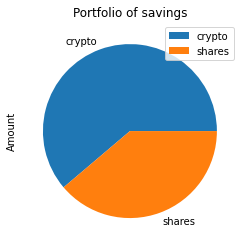

In [118]:
# Plot savings pie chart
df_savings.plot.pie(y= 'Amount', title = "Portfolio of savings" )

In [136]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = round(totamt_crypto + totamt_shares,2)
#print(total_savings)

# Validate if savings are sufficient to fund an emergency:
if total_savings > emergency_fund:
    print(f"Congratulations, you have enough savings in your portfolio for an emergency.")
elif total_savings == emergency_fund:
        print(f"Congratulations, on reaching your financial goal for an emergency.")
elif total_savings < emergency_fund:
    print(f" You need additional ${(emergency_fund - total_savings):0.2f} to reach your financial goal for an emergency.")

Congratulations, you have enough savings in your portfolio for an emergency.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [139]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-09', tz='America/New_York').isoformat()

In [161]:
# Get 5 years' worth of historical data for SPY and AGG- tickers already declared above 
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = api.get_barset(tickers, timeframe, start = start_date, end = end_date, limit = 1000).df
df_stock_data.dropna(inplace = True)
# Display sample data
df_stock_data.head(10)

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-09-20 00:00:00-04:00  109.84  109.9194  109.59  109.700  1216139.0   
2017-09-21 00:00:00-04:00  109.82  109.8500  109.68  109.680  2102279.0   
2017-09-22 00:00:00-04:00  109.86  109.9000  109.75  109.785  1325024.0   
2017-09-25 00:00:00-04:00  109.85  110.0400  109.82  110.025  3031529.0   
2017-09-26 00:00:00-04:00  109.95  110.0200  109.88  109.990  2074080.0   
2017-09-27 00:00:00-04:00  109.67  109.7500  109.60  109.668  1439682.0   
2017-09-28 00:00:00-04:00  109.58  109.7200  109.51  109.680  1553324.0   
2017-09-29 00:00:00-04:00  109.74  109.7700  109.54  109.640  2969204.0   
2017-10-02 00:00:00-04:00  109.43  109.4700  109.33  109.425  3840216.0   
2017-10-03 00:00:00-04:00  109.46  109.5400  109.40  109.520  2243369.0   

                              SPY                                          
                             open      high       low   close      volume  
time                                                                       
2017-09-20 00:00:00-04:00  250.06  250.1900  248.9200  250.09  42770537.0  
2017-09-21 00:00:00-04:00  249.89  249.9800  249.1850  249.40  29220256.0  
2017-09-22 00:00:00-04:00  249.05  249.6300  249.0200  249.42  31078666.0  
2017-09-25 00:00:00-04:00  249.14  249.5532  248.0800  248.94  42826453.0  
2017-09-26 00:00:00-04:00  249.42  249.7000  248.8050  249.05  36761208.0  
2017-09-27 00:00:00-04:00  249.88  250.4900  248.8700  250.02  51473231.0  
2017-09-28 00:00:00-04:00  249.73  250.4400  249.6300  250.34  25577234.0  
2017-09-29 00:00:00-04:00  250.34  251.3200  250.1300  251.20  41410208.0  
2017-10-02 00:00:00-04:00  251.49  252.3000  251.2926  252.29  37469184.0  
2017-10-03 00:00:00-04:00  252.46  252.8900  252.2300  252.85  33875099.0

In [162]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_runs = 500
MC_stock_30yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_runs,
    num_trading_days = 252*30
)

In [163]:
# Printing the simulation input data
MC_stock_30yr.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-09-20 00:00:00-04:00  109.84  109.9194  109.59  109.700  1216139.0   
2017-09-21 00:00:00-04:00  109.82  109.8500  109.68  109.680  2102279.0   
2017-09-22 00:00:00-04:00  109.86  109.9000  109.75  109.785  1325024.0   
2017-09-25 00:00:00-04:00  109.85  110.0400  109.82  110.025  3031529.0   
2017-09-26 00:00:00-04:00  109.95  110.0200  109.88  109.990  2074080.0   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2017-09-20 00:00:00-04:00          NaN  250.06  250.1900  248.920  250.09   
2017-09-21 00:00:00-04:00    -0.000182  249.89  249.9800  249.185  249.40   
2017-09-22 00:00:00-04:00     0.000957  249.05  249.6300  249.020  249.42   
2017-09-25 00:00:00-04:00     0.002186  249.14  249.5532  248.080  248.94   
2017-09-26 00:00:00-04:00    -0.000318  249.42  249.7000  248.805  249.05   

                                                    
                               volume daily_return  
time                                                
2017-09-20 00:00:00-04:00  42770537.0          NaN  
2017-09-21 00:00:00-04:00  29220256.0    -0.002759  
2017-09-22 00:00:00-04:00  31078666.0     0.000080  
2017-09-25 00:00:00-04:00  42826453.0    -0.001924  
2017-09-26 00:00:00-04:00  36761208.0     0.000442

In [164]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.001429   0.993152   0.996714   1.016117   1.001562   1.008488   
2      0.999935   0.981271   0.993301   1.002629   0.997078   1.020776   
3      1.007548   0.989206   0.995657   1.005422   0.997543   1.037981   
4      1.026501   0.982433   0.990721   1.018499   0.996078   1.032957   
...         ...        ...        ...        ...        ...        ...   
7556  28.134250  19.518017  44.732820  25.015072  28.575768  20.628025   
7557  28.128564  19.600535  44.754871  25.134730  28.529700  20.777897   
7558  27.775611  19.487760  44.327021  25.170128  28.679528  21.130984   
7559  27.735955  19.468327  44.318187  25.452379  28.846967  20.941752   
7560  27.853009  19.544670  44.557146  25.153615  28.603349  20.923277   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      1.006435   1.008644   0.988688   0.990698  ...   1.009552   0.997151   
2      1.010283   1.012205   0.994287   0.994422  ...   0.989012   0.999249   
3      1.025648   1.018300   0.996955   0.985547  ...   0.983856   0.988407   
4      1.011858   1.023235   0.997465   0.980664  ...   0.971482   0.985884   
...         ...        ...        ...        ...  ...        ...        ...   
7556  13.244307  16.680223  24.869507  14.787353  ...  27.328482  11.895729   
7557  13.353144  16.619907  24.940007  14.785756  ...  27.090514  11.981874   
7558  13.327012  16.709068  24.727414  14.622681  ...  27.375245  12.056538   
7559  13.327504  16.704764  24.836504  14.639965  ...  27.220081  12.192624   
7560  13.401702  16.949591  25.013839  14.515007  ...  27.229351  12.298466   

            492        493        494        495        496       497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000  1.000000   
1      1.005600   1.002158   1.010475   0.992737   1.001118  0.987240   
2      1.005314   1.017709   1.002304   0.993597   1.006660  0.987029   
3      1.014627   1.009100   1.003881   0.977858   1.011010  0.980440   
4      1.019385   1.017924   1.010922   0.979992   0.996622  0.979754   
...         ...        ...        ...        ...        ...       ...   
7556  14.840039  57.731602  74.726530  12.685205  11.320696  5.573856   
7557  14.874107  58.758578  74.694276  12.685928  11.254485  5.577054   
7558  14.955701  58.655182  74.483577  12.507515  11.396960  5.529251   
7559  15.001069  59.586722  74.290061  12.516412  11.426545  5.488727   
7560  15.083744  60.087624  73.866191  12.689776  11.288680  5.421749   

            498        499  
0      1.000000   1.000000  
1      1.024644   1.009056  
2      1.020531   1.017587  
3      1.025015   1.017764  
4      1.031803   1.038372  
...         ...        ...  
7556  38.081521  22.129811  
7557  38.279067  21.952467  
7558  38.381992  21.849282  
7559  38.251326  21.894373  
7560  38.515838  22.071531  

[7561 rows x 500 columns]

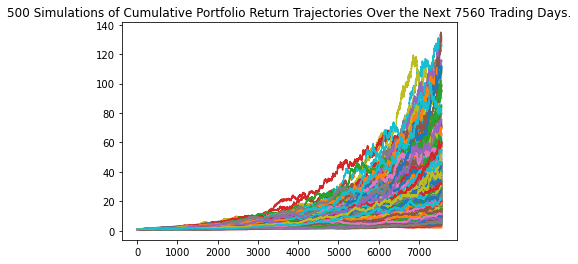

In [165]:
# Plot simulation outcomes
line_plot = MC_stock_30yr.plot_simulation()

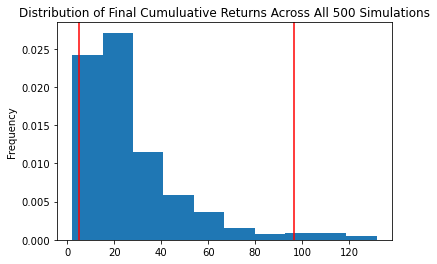

In [166]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_30yr.plot_distribution()

### Retirement Analysis

In [167]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_30yr = MC_stock_30yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_30yr)

count           500.000000
mean             27.118225
std              22.058460
min               2.020577
25%              13.264941
50%              19.994138
75%              33.186256
max             131.752415
95% CI Lower      4.835454
95% CI Upper     96.727834
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [168]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $99159.68 and $1465265.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [169]:
# Set initial investment of #20000 to increment by an multiplier e.g. 50%
invest_multiplier = 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment * invest_multiplier,2)
ci_upper = round(tbl[9]*initial_investment * invest_multiplier,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment * invest_multiplier} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $148739.52 and $2197898.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [170]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with same weights for bonds and shares but higher initial investment
MC_stock_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_runs,
    num_trading_days = 252*5
)

In [171]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997558  0.995412  0.998290  1.005352  1.000431  1.003222  0.999317   
2     1.007977  0.995686  1.001049  1.000706  1.005447  1.002565  0.993297   
3     1.004683  0.996973  1.006582  0.997585  0.992998  1.010421  0.988504   
4     0.996106  0.997501  0.993806  0.991012  1.000031  1.021139  0.990840   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.329564  1.332531  1.673919  1.280405  1.571294  1.590860  1.414438   
1257  1.338388  1.339329  1.674158  1.269987  1.575878  1.595564  1.410642   
1258  1.350009  1.339759  1.656392  1.268472  1.573672  1.582304  1.406412   
1259  1.379651  1.331027  1.659195  1.266476  1.578959  1.579742  1.404842   
1260  1.366971  1.335930  1.656262  1.268466  1.606198  1.574284  1.396699   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.014066  0.995742  1.004964  ...  1.004383  0.994682  1.004466   
2     1.008914  0.996023  0.991847  ...  0.999160  1.003816  0.994499   
3     1.012089  0.991066  0.979171  ...  0.994990  1.000764  0.996289   
4     1.026315  0.993827  0.987869  ...  0.986927  1.004418  0.991247   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.417084  1.487763  2.100478  ...  2.008143  1.230945  2.506785   
1257  2.464858  1.463921  2.080897  ...  2.028489  1.234367  2.531077   
1258  2.465736  1.482371  2.092011  ...  2.036962  1.221013  2.528283   
1259  2.507091  1.500002  2.047903  ...  2.041984  1.232044  2.550328   
1260  2.534691  1.500596  2.036177  ...  2.068742  1.220186  2.542520   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.005184  0.996495  0.994642  1.009297  1.001522  0.993956  0.990593  
2     1.008580  0.994398  0.981105  1.005558  0.996139  0.991069  0.992246  
3     1.011022  0.996185  1.006625  1.011634  0.999018  0.983377  1.004145  
4     1.010496  0.993187  1.020166  1.014241  1.004807  0.984865  1.010210  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.542229  1.276956  1.425700  1.274467  1.462016  0.989302  2.074275  
1257  1.540823  1.290839  1.422498  1.276102  1.469528  0.998969  2.101492  
1258  1.545022  1.279283  1.430282  1.257011  1.469712  0.989576  2.128625  
1259  1.528090  1.268324  1.427278  1.252487  1.473176  0.981925  2.136069  
1260  1.533028  1.272008  1.436083  1.249212  1.473653  0.979753  2.134662  

[1261 rows x 500 columns]

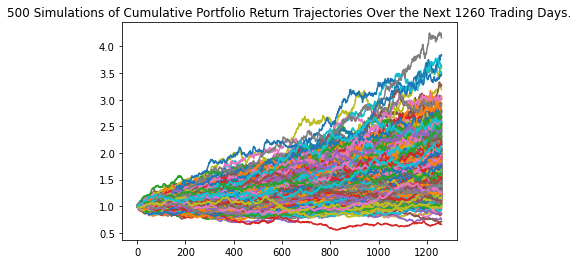

In [194]:
# Plot simulation outcomes
line_plot = MC_stock_5yr.plot_simulation()

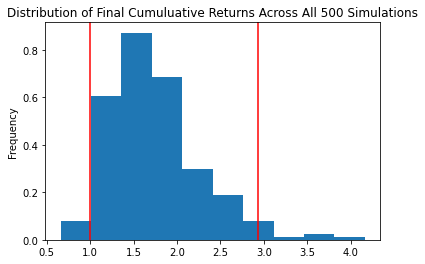

In [173]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_5yr.plot_distribution()

In [174]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yr = MC_stock_5yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yr)

count           500.000000
mean              1.737456
std               0.512518
min               0.659243
25%               1.374235
50%               1.639225
75%               2.000610
max               4.163832
95% CI Lower      0.996760
95% CI Upper      2.938676
Name: 1260, dtype: float64


In [177]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5yr[8]*initial_investment,2)
ci_upper_five = round(tbl_5yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $59805.63 and $176320.57


### Ten Years Retirement Option

In [178]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns and weight adjusted for greater stocks (.70) and bonds (.30)
MC_stock_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = num_runs,
    num_trading_days = 252*10
)

In [179]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.985015  1.004650  0.984775  0.999750  0.993154  0.999261  0.987983   
2     0.979835  1.010764  0.991170  0.995911  1.009221  0.996262  0.989097   
3     0.969106  1.003882  0.992961  1.002528  1.009378  1.003349  0.996108   
4     0.981506  1.016483  1.017582  0.995798  1.001705  1.024609  0.988171   
...        ...       ...       ...       ...       ...       ...       ...   
2516  3.196960  5.084399  4.439480  3.864499  2.216830  3.534097  1.802702   
2517  3.234049  5.016881  4.350030  3.873854  2.216243  3.608375  1.808912   
2518  3.273805  5.090798  4.362843  3.816558  2.238608  3.597288  1.812413   
2519  3.282881  5.127632  4.367331  3.934196  2.196125  3.525762  1.819396   
2520  3.263497  5.185670  4.374704  3.958332  2.209617  3.542185  1.798102   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.993987  0.997602  0.987143  ...  1.003017  0.994647  0.994312   
2     1.000594  0.984092  0.991673  ...  0.999833  0.991563  0.986347   
3     0.987051  0.974551  0.989190  ...  1.014408  0.985920  0.981118   
4     1.009182  0.969360  0.980653  ...  1.003595  0.981021  0.990580   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.541555  2.161589  3.331782  ...  3.366151  4.607436  2.877071   
2517  2.513212  2.134146  3.381433  ...  3.365674  4.593860  2.881901   
2518  2.503011  2.132376  3.412295  ...  3.377005  4.612330  2.906007   
2519  2.492329  2.099491  3.433352  ...  3.382958  4.627452  2.910888   
2520  2.452120  2.109073  3.473460  ...  3.398128  4.571363  2.888636   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.990465  0.998933  1.007789  0.988862  0.982686  0.998089  1.000360  
2     0.981104  0.999401  1.003955  0.994414  0.973830  0.999273  0.986338  
3     0.965700  1.000574  0.998575  0.994402  0.965102  0.989335  0.986182  
4     0.957503  1.007315  1.010601  0.990784  0.961194  0.991544  1.010051  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.837562  3.346678  3.156899  5.369395  5.264448  4.689861  2.264531  
2517  2.859843  3.398642  3.169747  5.375301  5.168422  4.646635  2.295458  
2518  2.851591  3.453496  3.139763  5.396013  5.175232  4.654482  2.289830  
2519  2.866764  3.434581  3.163708  5.441394  5.161306  4.606173  2.319110  
2520  2.854402  3.437735  3.158644  5.393354  5.082113  4.604610  2.325872  

[2521 rows x 500 columns]

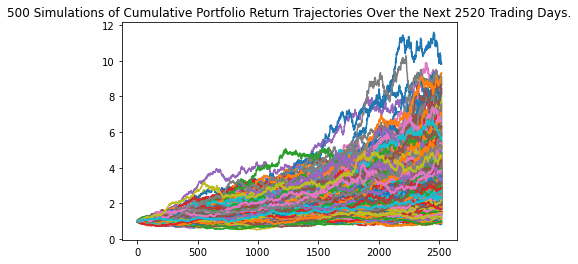

In [195]:
# Plot simulation outcomes
line_plot = MC_stock_10yr.plot_simulation()

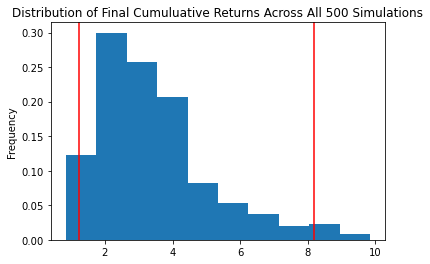

In [183]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_10yr.plot_distribution()

In [187]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10yr = MC_stock_10yr.summarize_cumulative_return()

# Print summary statistics
print(tbl_10yr)

count           500.000000
mean              3.444459
std               1.687926
min               0.841847
25%               2.281753
50%               3.107532
75%               4.152000
max               9.848929
95% CI Lower      1.223419
95% CI Upper      8.187355
Name: 2520, dtype: float64


In [189]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10yr[8]*initial_investment,2)
ci_upper_ten = round(tbl_10yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73405.17 and $491241.3


In [ ]:
# The end